In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

# кол-во полетов vs месяц

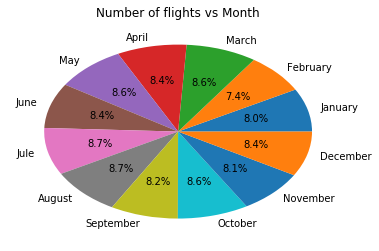

In [26]:
attraction_month = flights.groupby('month')['Unnamed: 0']
arr = attraction_month.count()

plt.title('Number of flights vs Month')
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.pie(arr, labels = labels, autopct='%1.1f%%')
plt.show()

кол-во полетов в течение года практически одинаково (чуть больше летом, чуть меньше зимой)

# кол-во задержек vs месяц

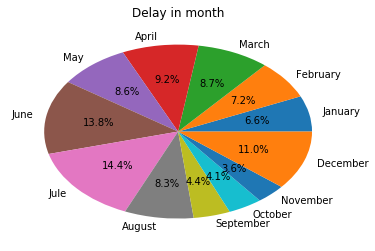

In [27]:
month_flights = flights.groupby("month")
delay = month_flights['dep_delay'].mean()
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.pie(delay, labels = labels, autopct='%1.1f%%')
plt.title("Delay in month")
plt.show()

кол-во задержек больше всего в июне, июле (курортный сезон) и в декабре. в эти периоды стоит увеличить штат

# кол-во задержек vs день недели

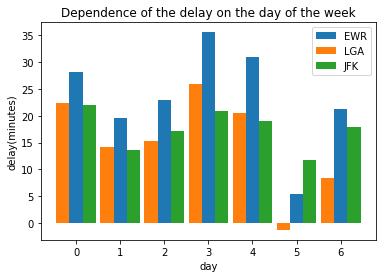

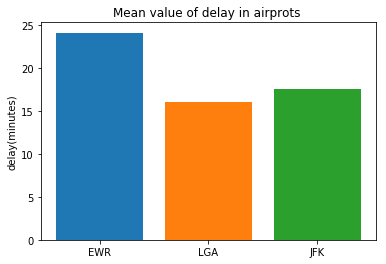

In [75]:
data = pd.read_csv(url1, sep = ',')
flights['delay'] = flights['arr_delay'] + flights['dep_delay']

flights['weekday'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']])
flights['weekday'] = flights['weekday'].apply(lambda x: x.weekday())
flights['time'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']])
flights['time'] = flights['time'].apply(lambda x: x.dayofyear)
flights['dayofyear'] = flights['time']
flights['time'] = (flights['time']-1)*24 + flights['hour']
flights['week'] = flights['dayofyear']//7 + 1;


plt.title('Dependence of the delay on the day of the week')
plt.bar(np.array([i for i in range(7)]), np.array(flights[flights['origin']=='EWR'].groupby('weekday')['delay'].mean()), width = 0.3, label='EWR')
plt.bar(np.array([i for i in range(7)])-0.3, np.array(flights[flights['origin']=='LGA'].groupby('weekday')['delay'].mean()), width = 0.3, label='LGA')
plt.bar(np.array([i for i in range(7)])+0.3, np.array(flights[flights['origin']=='JFK'].groupby('weekday')['delay'].mean()), width = 0.3, label='JFK')
plt.legend()

plt.xlabel('day')
plt.ylabel('delay(minutes)')

plt.show()


plt.title('Mean value of delay in airprots ')
labels =['EWR', 'LGA', 'JFK' ]


plt.bar('EWR', np.array(flights[flights['origin']=='EWR'].groupby('origin')['delay'].mean()), label='EWR')
plt.bar('LGA', np.array(flights[flights['origin']=='LGA'].groupby('origin')['delay'].mean()), label='LGA')
plt.bar('JFK', np.array(flights[flights['origin']=='JFK'].groupby('origin')['delay'].mean()), label='JFK')

plt.ylabel('delay(minutes)')

plt.show()


во все дни, кроме субботы, задержки рейсов. следует увеличить персонал в эти дни. также большая часть задержек приходится на компанию EWR. возможно, нужно перераспределить часть рейсов на другие компании.

# кол-во задержек vs время суток

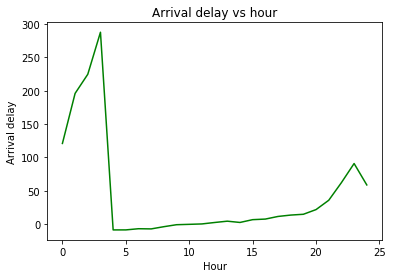

In [92]:
arrival_del = flights.dropna(subset=['arr_delay'])
arrival_del = arrival_del.groupby('hour')['arr_delay'].mean()
plt.plot(arrival_del.index, arrival_del, c='green')
plt.xlabel('Hour')
plt.ylabel('Arrival delay')
plt.title('Arrival delay vs hour')
plt.show()


больше всего задержек ночью (00.00-3.00)

# задержки vs погодные условия

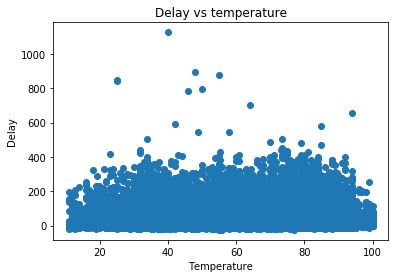

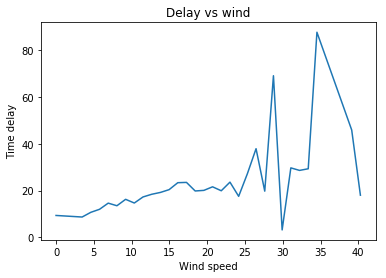

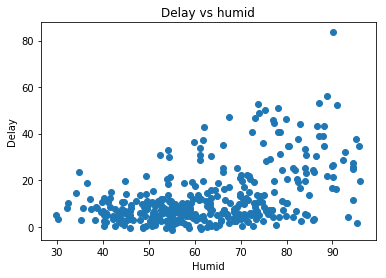

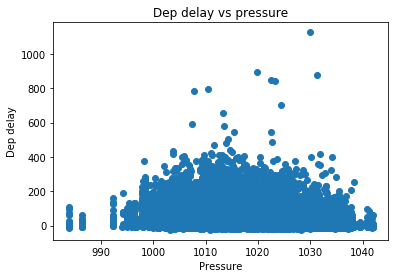

In [124]:
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.title('Delay vs temperature')
plt.scatter(flight_weather['temp'], flight_weather['dep_delay'])
plt.xlabel('Temperature')
plt.ylabel('Delay')
plt.show()


plt.title('Delay vs wind')
p=flight_weather.loc[:, ['dep_delay','wind_speed']].groupby('wind_speed').mean()
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Wind speed')
plt.ylabel('Time delay')
plt.show()

plt.title('Delay vs humid')
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_humid = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_humid)
plt.xlabel('Humid')
plt.ylabel('Delay')
plt.show()

plt.title('Dep delay vs pressure')
plt.scatter(flight_weather['pressure'], flight_weather['dep_delay'])
plt.xlabel('Pressure')
plt.ylabel('Dep delay')
plt.show()




кол-во задержек не зависит от температуры и давления. чем больше скорость ветра, тем продолжительней задержка, и чем больше влажность, тем их больше.